# Deep Learning with PyTorch




### Import all assets

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch


import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch import nn
from torch import optim
import torch.nn.functional as F

# Custom DataSet
from data import iris
from data import helper

In [2]:
# Get the datasets
iris_data_file = 'data/sand.txt'
train_ds, test_ds = iris.get_datasets(iris_data_file)

# How many instances have we got?
print('# instances in training set: ', len(train_ds))
print('# instances in testing/validation set: ', len(test_ds))


train_loader = torch.utils.data.DataLoader(dataset=test_ds, batch_size= 1, shuffle=True)
test_loader  = torch.utils.data.DataLoader(dataset=test_ds, batch_size=1, shuffle=True)
dataiter = iter(train_loader)
images, labels = dataiter.next()
m = images.mean()
s = images.std()
#images = (images - m)/s
print(images)
print(labels)



# instances in training set:  1
# instances in testing/validation set:  298
tensor([[-0.1400, -0.8200,  0.9900, -0.9900,  0.0300, -0.9900,  0.8800, -0.8200,
          0.2000, -0.4800]])
tensor([2])


### Create the Fully Connected Feed Forward Neural Network

**Create the module**

In [3]:
class Network(nn.Module):
    def __init__(self, input_size, output_size, hidden_layers, drop_p=0.5):
        ''' Builds a feedforward network with arbitrary hidden layers.
        
            Arguments
            ---------
            input_size: integer, size of the input
            output_size: integer, size of the output layer
            hidden_layers: list of integers, the sizes of the hidden layers
            drop_p: float between 0 and 1, dropout probability
        '''
        super().__init__()
        # Add the first layer, input to a hidden layer
        self.hidden_layers = nn.ModuleList([nn.Linear(input_size, hidden_layers[0])])
        
        # Add a variable number of more hidden layers
        layer_sizes = zip(hidden_layers[:-1], hidden_layers[1:])
        self.hidden_layers.extend([nn.Linear(h1, h2) for h1, h2 in layer_sizes])
        
        self.output = nn.Linear(hidden_layers[-1], output_size)
        
        self.dropout = nn.Dropout(p=drop_p)
        
    def forward(self, x):
        ''' Forward pass through the network, returns the output logits '''
        
        # Forward through each layer in `hidden_layers`, with ReLU activation and dropout
        for linear in self.hidden_layers:
            x = F.relu(linear(x))
            x = self.dropout(x)
        
        x = self.output(x)

        return F.log_softmax(x, dim=1)



**Print the module**

In [4]:
# Create the network, define the criterion and optimizer
model = Network(10, 10, [128,128,64], drop_p=0.5)
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


### Create the DataLoader

### Instantiate the network, the loss function and the optimizer

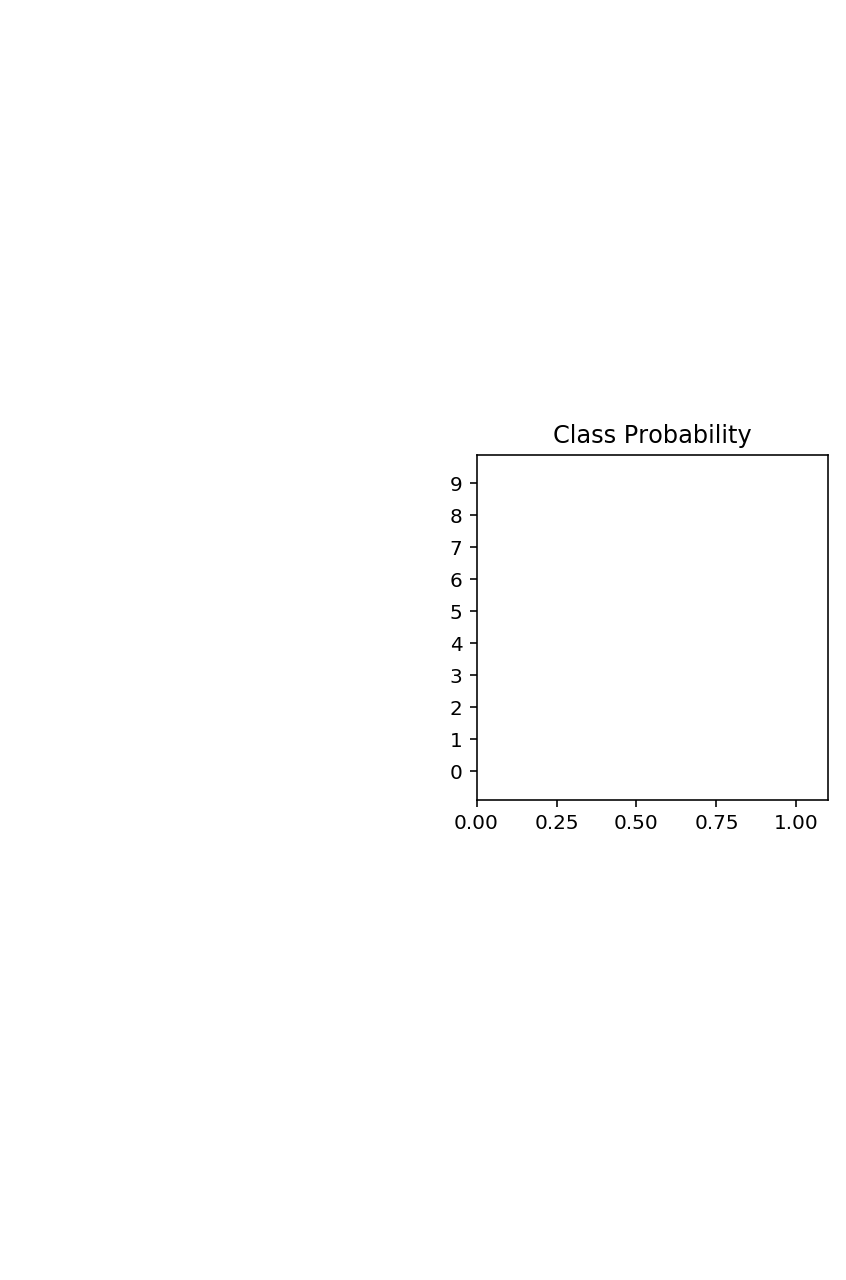

In [5]:
# Grab some data
dataiter = iter(train_loader)
images, labels = dataiter.next()

images.resize_(1, 1,10)

img_idx = 0
ps = model.forward(images[img_idx,:])

img = images[img_idx]
helper.view_classify(ps)

### Train it!

Plot loss vs iterations

### Savign the model to disk, and loading it back

In [6]:
epochs = 1500
print_every = 500
steps = 0
for e in range(epochs):
    running_loss = 0
    for images, labels in iter(train_loader):
        
        #m = images.mean()
        #images = (images - m)/ s
        #print(images)
        #print(labels)
        steps += 1
        # Flatten MNIST images into a 784 long vector
        images.resize_(images.size()[0], 10)
        
        optimizer.zero_grad()
        
        # Forward and backward passes
        output = model.forward(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
        if steps % print_every == 0:
            print("Epoch: {}/{}... ".format(e+1, epochs),
                  "Loss: {:.4f}".format(running_loss/print_every))
            
            running_loss = 0
        
        
print(steps)

Epoch: 2/1500...  Loss: 0.3177
Epoch: 4/1500...  Loss: 0.1545
Epoch: 6/1500...  Loss: 0.0126
Epoch: 7/1500...  Loss: 0.2995
Epoch: 9/1500...  Loss: 0.1613
Epoch: 11/1500...  Loss: 0.0284
Epoch: 12/1500...  Loss: 0.3114
Epoch: 14/1500...  Loss: 0.1732
Epoch: 16/1500...  Loss: 0.0424
Epoch: 17/1500...  Loss: 0.3203
Epoch: 19/1500...  Loss: 0.1857
Epoch: 21/1500...  Loss: 0.0492
Epoch: 22/1500...  Loss: 0.3292
Epoch: 24/1500...  Loss: 0.1958
Epoch: 26/1500...  Loss: 0.0592
Epoch: 27/1500...  Loss: 0.3405
Epoch: 29/1500...  Loss: 0.2026
Epoch: 31/1500...  Loss: 0.0752
Epoch: 32/1500...  Loss: 0.3394
Epoch: 34/1500...  Loss: 0.2198
Epoch: 36/1500...  Loss: 0.0954
Epoch: 37/1500...  Loss: 0.3456
Epoch: 39/1500...  Loss: 0.2164
Epoch: 41/1500...  Loss: 0.1088
Epoch: 42/1500...  Loss: 0.3716
Epoch: 44/1500...  Loss: 0.2378
Epoch: 46/1500...  Loss: 0.1123
Epoch: 47/1500...  Loss: 0.3650
Epoch: 49/1500...  Loss: 0.2298
Epoch: 51/1500...  Loss: 0.1186
Epoch: 53/1500...  Loss: 0.0043
Epoch: 54/150

Epoch: 423/1500...  Loss: 0.1366
Epoch: 425/1500...  Loss: 0.0927
Epoch: 427/1500...  Loss: 0.0392
Epoch: 428/1500...  Loss: 0.1957
Epoch: 430/1500...  Loss: 0.0981
Epoch: 432/1500...  Loss: 0.0418
Epoch: 433/1500...  Loss: 0.1751
Epoch: 435/1500...  Loss: 0.1226
Epoch: 437/1500...  Loss: 0.0395
Epoch: 438/1500...  Loss: 0.1998
Epoch: 440/1500...  Loss: 0.1455
Epoch: 442/1500...  Loss: 0.0422
Epoch: 443/1500...  Loss: 0.1969
Epoch: 445/1500...  Loss: 0.1108
Epoch: 447/1500...  Loss: 0.0634
Epoch: 448/1500...  Loss: 0.1973
Epoch: 450/1500...  Loss: 0.1519
Epoch: 452/1500...  Loss: 0.0658
Epoch: 454/1500...  Loss: 0.0048
Epoch: 455/1500...  Loss: 0.1562
Epoch: 457/1500...  Loss: 0.0827
Epoch: 459/1500...  Loss: 0.0199
Epoch: 460/1500...  Loss: 0.1658
Epoch: 462/1500...  Loss: 0.0751
Epoch: 464/1500...  Loss: 0.0166
Epoch: 465/1500...  Loss: 0.1503
Epoch: 467/1500...  Loss: 0.0770
Epoch: 469/1500...  Loss: 0.0275
Epoch: 470/1500...  Loss: 0.1471
Epoch: 472/1500...  Loss: 0.0990
Epoch: 474

Epoch: 841/1500...  Loss: 0.1235
Epoch: 843/1500...  Loss: 0.0503
Epoch: 844/1500...  Loss: 0.1716
Epoch: 846/1500...  Loss: 0.0916
Epoch: 848/1500...  Loss: 0.0544
Epoch: 849/1500...  Loss: 0.1895
Epoch: 851/1500...  Loss: 0.1069
Epoch: 853/1500...  Loss: 0.0550
Epoch: 855/1500...  Loss: 0.0038
Epoch: 856/1500...  Loss: 0.1438
Epoch: 858/1500...  Loss: 0.0815
Epoch: 860/1500...  Loss: 0.0147
Epoch: 861/1500...  Loss: 0.1594
Epoch: 863/1500...  Loss: 0.0750
Epoch: 865/1500...  Loss: 0.0171
Epoch: 866/1500...  Loss: 0.1320
Epoch: 868/1500...  Loss: 0.0736
Epoch: 870/1500...  Loss: 0.0468
Epoch: 871/1500...  Loss: 0.1590
Epoch: 873/1500...  Loss: 0.1266
Epoch: 875/1500...  Loss: 0.0249
Epoch: 876/1500...  Loss: 0.1146
Epoch: 878/1500...  Loss: 0.1073
Epoch: 880/1500...  Loss: 0.0500
Epoch: 881/1500...  Loss: 0.2090
Epoch: 883/1500...  Loss: 0.1010
Epoch: 885/1500...  Loss: 0.0366
Epoch: 886/1500...  Loss: 0.1219
Epoch: 888/1500...  Loss: 0.0864
Epoch: 890/1500...  Loss: 0.0436
Epoch: 891

Epoch: 1250/1500...  Loss: 0.1466
Epoch: 1252/1500...  Loss: 0.1000
Epoch: 1254/1500...  Loss: 0.0505
Epoch: 1256/1500...  Loss: 0.0074
Epoch: 1257/1500...  Loss: 0.1025
Epoch: 1259/1500...  Loss: 0.0518
Epoch: 1261/1500...  Loss: 0.0108
Epoch: 1262/1500...  Loss: 0.1687
Epoch: 1264/1500...  Loss: 0.0564
Epoch: 1266/1500...  Loss: 0.0120
Epoch: 1267/1500...  Loss: 0.1266
Epoch: 1269/1500...  Loss: 0.0657
Epoch: 1271/1500...  Loss: 0.0295
Epoch: 1272/1500...  Loss: 0.1329
Epoch: 1274/1500...  Loss: 0.0951
Epoch: 1276/1500...  Loss: 0.0183
Epoch: 1277/1500...  Loss: 0.1661
Epoch: 1279/1500...  Loss: 0.0645
Epoch: 1281/1500...  Loss: 0.0377
Epoch: 1282/1500...  Loss: 0.1752
Epoch: 1284/1500...  Loss: 0.0872
Epoch: 1286/1500...  Loss: 0.0457
Epoch: 1287/1500...  Loss: 0.1602
Epoch: 1289/1500...  Loss: 0.1243
Epoch: 1291/1500...  Loss: 0.0404
Epoch: 1292/1500...  Loss: 0.1637
Epoch: 1294/1500...  Loss: 0.1036
Epoch: 1296/1500...  Loss: 0.0474
Epoch: 1297/1500...  Loss: 0.1723
Epoch: 1299/15

tensor([[0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000]])
tensor([2])


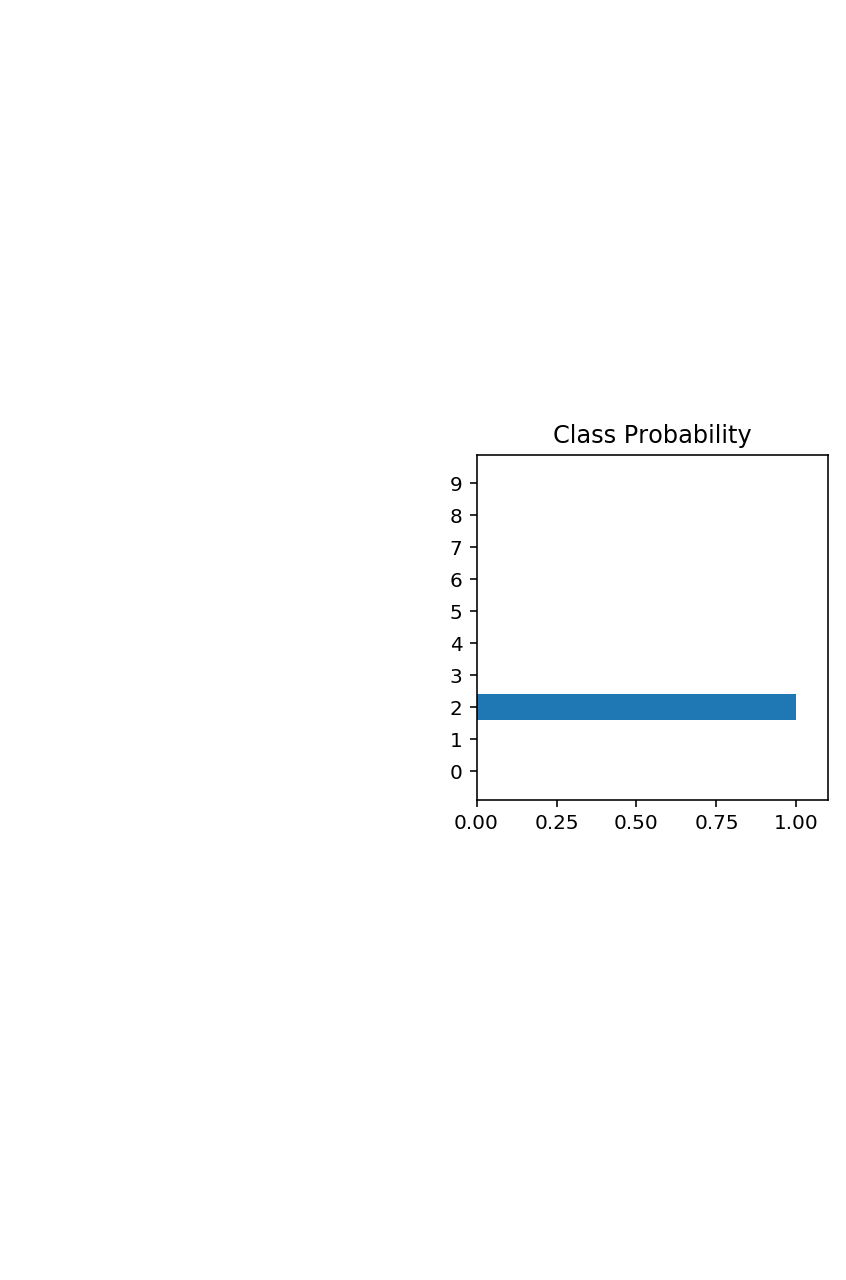

In [35]:
#list = [
#[0.54,-0.82,0.54,-0.99,0.54,-0.48,-0.14,-0.99,0.88,-0.99],
#[0.88,-0.82,0.99,-0.65,0.54,-0.99,0.03,-0.99,0.99,-0.82],
#[0.99,-0.99,0.54,-0.99,0.2,-0.82,0.99,-0.82,0.71,-0.82],
#[0.71,-0.99,0.2,-0.48,0.71,-0.65,-0.31,-0.99,0.54,-0.99],
#[0.71,-0.48,0.03,-0.65,0.99,-0.65,-0.14,-0.65,0.03,-0.82],
#[0.2,-0.82,0.99,-0.48,-0.31,-0.65,0.03,-0.48,0.99,-0.65],
#[0.03,-0.48,0.88,-0.65,0.88,-0.99,-0.31,-0.48,-0.31,-0.82],
#[0.2,-0.48,0.2,-0.99,0.54,-0.82,0.03,-0.48,0.54,-0.65],
#[-0.14,-0.65,-0.14,-0.99,0.2,-0.99,0.88,-0.48,0.88,-0.65],
#[-0.14,-0.65,0.03,-0.99,-0.31,-0.99,0.37,-0.82,0.2,-0.65],
#[0.71,-0.65,0.03,-0.99,0.99,-0.99,0.99,-0.82,0.2,-0.48],
#[0.54,-0.48,-0.14,-0.82,0.37,-0.65,0.54,-0.99,0.2,-0.82],
#[0.54,-0.48,-0.14,-0.65,-0.14,-0.99,-0.31,-0.48,-0.31,-0.82]]





images, labels = next(iter(train_loader))



#x = torch.FloatTensor([n])

img = images
    

# Turn off gradients to speed up this part
with torch.no_grad():
    logits = model.forward(img)
    


# Output of the network are logits, need to take softmax for probabilities
ps = F.softmax(logits, dim=1)

helper.view_classify(ps)
print(ps)
print(labels)

